<a href="https://colab.research.google.com/github/sjd1365/learn/blob/main/Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()



Saving Disease_clean.xlsx to Disease_clean (1).xlsx


In [81]:
df = pd.read_excel('Disease_clean.xlsx')
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,0
1,5,4,4,5,7,3,2,1,0
2,3,1,1,1,2,3,1,1,0
3,6,8,8,1,3,3,7,1,0
4,4,1,1,3,2,3,1,1,0


## Data Undertanding


In [82]:
df.shape

(699, 9)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_Cell_Size         699 non-null    int64
 2   Uniformity_Cell_Shape        699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bland_Chromatin              699 non-null    int64
 6   Normal_Nucleoli              699 non-null    int64
 7   Mitoses                      699 non-null    int64
 8   Class                        699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB


In [84]:
np.sum(df.isnull(), axis = 0)

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


In [85]:
np.sum(df.duplicated())

np.int64(258)

In [86]:
df.drop_duplicates(inplace=True)

In [87]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,5.476190,4.333333,4.396825,3.820862,3.936508,4.283447,3.941043,1.929705,0.539683
std,2.842854,3.238967,3.115050,3.173344,2.467158,2.647284,3.410701,2.083933,0.498989
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [88]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

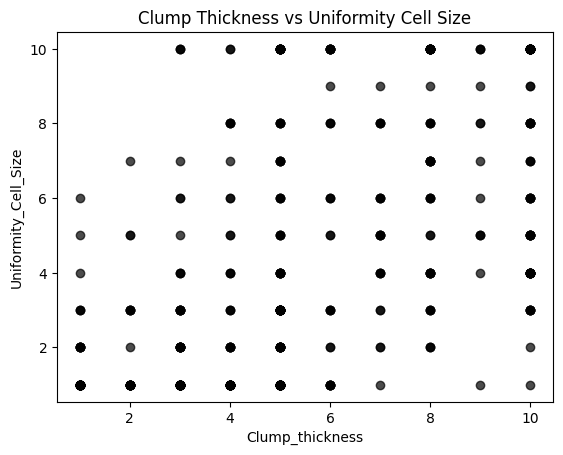

In [89]:
# Use the existing dataframe 'list' and valid numeric columns for plotting
plt.scatter(df['Clump_thickness'], df['Uniformity_Cell_Size'], c='black', alpha=0.7)
plt.xlabel('Clump_thickness')
plt.ylabel('Uniformity_Cell_Size')
plt.title('Clump Thickness vs Uniformity Cell Size')
plt.show()

In [17]:
X.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


In [18]:
# split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
print('Type X is: ',type(X))
print('Type y is: ',type(y))

Type X is:  <class 'pandas.core.frame.DataFrame'>
Type y is:  <class 'pandas.core.series.Series'>


In [20]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
430,1,3,1,1,2,2,2,1
458,5,1,2,1,2,1,1,1
333,5,4,6,6,4,4,3,1
285,8,10,10,10,8,10,7,3
152,10,10,8,6,4,8,10,1


##  Preprocessing – Scaling the features

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train        = pd.DataFrame(X_train_scaled)

X_test_scaled  = scaler.fit_transform(X_test)
X_test         = pd.DataFrame(X_test_scaled)

In [22]:
X_train


,0,1,2,3,4,5,6,7
0,0.000000,0.222222,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000
1,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000
2,0.444444,0.333333,0.555556,0.555556,0.333333,0.333333,0.222222,0.000000
3,0.777778,1.000000,1.000000,1.000000,0.777778,1.000000,0.666667,0.222222
4,1.000000,1.000000,0.777778,0.555556,0.333333,0.777778,1.000000,0.000000
...,...,...,...,...,...,...,...,...
303,0.333333,0.111111,0.222222,0.444444,0.222222,0.666667,0.555556,0.000000
304,0.333333,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000
305,0.444444,0.222222,0.111111,0.777778,0.444444,0.777778,0.000000,0.111111
306,0.000000,0.000000,0.000000,0.000000,0.444444,0.222222,0.000000,0.000000


##  Fit & Predict the Model and check the error rate for different K Values

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt

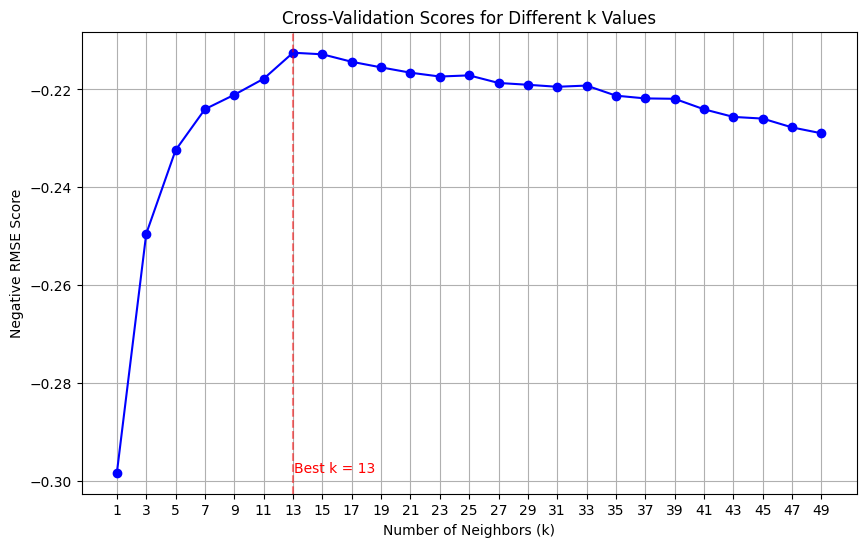

Best k value: 13 with score: -0.21248716981830848


In [24]:
from sklearn.model_selection import cross_val_score

k = [i for i in range(1, 50,2)]  # Example: testing k from 1 to 49 with stepsize 2

# Initialize dictionary to store CV scores
CV = {}

# Loop through each k value
for i in k:  # Start from 1 instead of 0
    KNN = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='minkowski', p=2)

    # K-fold cross validation
    scores = cross_val_score(estimator=KNN, X=X_train, y=y_train,
                            scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

    # Calculate the average scores and save the results
    CV[i] = scores.mean()

# Convert CV dictionary to lists for plotting
k_values = [key for key in CV.keys()]
cv_scores = [value for value in CV.values()]

# Plot the CV scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Scores for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Negative RMSE Score')
plt.grid(True)
plt.xticks(k_values)

# Find and mark the best k value
best_k = k_values[np.argmax(cv_scores)]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.5)
plt.text(best_k+0.1, min(cv_scores), f'Best k = {best_k}', color='red')

plt.show()

print(f"Best k value: {best_k} with score: {CV[best_k]}")

In [25]:
cv_scores


[np.float64(-0.2983189075185561),
 np.float64(-0.24948618806151704),
 np.float64(-0.232398173210045),
 np.float64(-0.22402422478530765),
 np.float64(-0.22108253112031484),
 np.float64(-0.21780889724356295),
 np.float64(-0.21248716981830848),
 np.float64(-0.21280995084634569),
 np.float64(-0.21433952779991458),
 np.float64(-0.2154817850119466),
 np.float64(-0.2165670902193897),
 np.float64(-0.21735207068957027),
 np.float64(-0.21711667231637238),
 np.float64(-0.21866510602545658),
 np.float64(-0.21903733933411793),
 np.float64(-0.21944633571250308),
 np.float64(-0.21920185548200477),
 np.float64(-0.22126197696390987),
 np.float64(-0.22182516442742378),
 np.float64(-0.22190245519814908),
 np.float64(-0.22404928990492684),
 np.float64(-0.22560376809158367),
 np.float64(-0.22594751414900527),
 np.float64(-0.22775041015085828),
 np.float64(-0.22895185577418706)]

In [26]:
np.argmax(cv_scores)

np.int64(6)

In [27]:
k_values[8]

17

## Build KNN model for regression

In [28]:
# Build KNN regressor
KNN = KNeighborsRegressor(n_neighbors=best_k,weights = 'uniform',metric = 'minkowski',p=2)

# Fit the model on train
KNN.fit(X_train, y_train)

# Predict test data
Test_Prediction=KNN.predict(X_test)

In [29]:
Results = pd.DataFrame({'MSE': metrics.mean_squared_error(y_test, Test_Prediction),
                        'RMSE': np.sqrt(metrics.mean_squared_error(y_test, Test_Prediction)),
                        'MAPE': metrics.mean_absolute_percentage_error(y_test, Test_Prediction),
                        'MAE' : metrics.mean_absolute_error(y_test, Test_Prediction),
                        'R^2' : metrics.r2_score(y_test, Test_Prediction)},
                       index = ['KNN - K-fold'])
Results

,MSE,RMSE,MAPE,MAE,R^2
KNN - K-fold,0.069849,0.26429,1.667035e+14,0.115674,0.720461


##  Implementing GridsearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [i for i in range(1, 50, 2)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()

model1 = GridSearchCV(knn, param_grid, cv=5)
model1.fit(X_train, y_train)
model1.best_params_

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

In [31]:
KNN2 = KNeighborsRegressor(n_neighbors=model1.best_params_['n_neighbors'],
                          metric=model1.best_params_['metric'],
                          weights=model1.best_params_['weights'])

KNN2.fit(X_train, y_train)

Test_prediction=KNN2.predict(X_test)

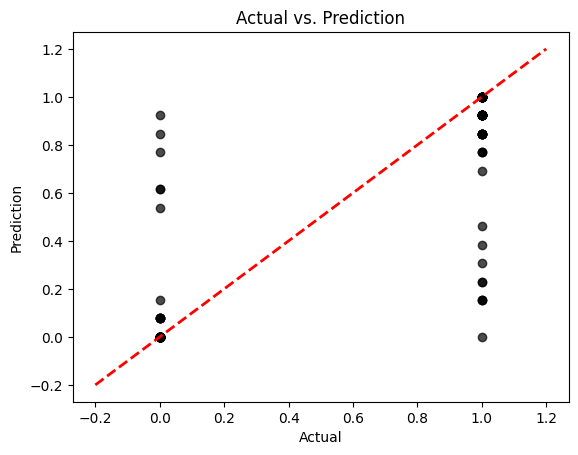

In [32]:
#Plot actual vs. prediction - Test
plt.scatter(y_test, Test_prediction, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min() - 0.2, y_test.max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 2, linestyle='--')
plt.show()

In [90]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [91]:
# df['Bare_Nuclei'].fillna(method='ffill', inplace=True)

In [92]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [93]:
# Ensure the column is numeric (non-numeric -> NaN)
# df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# # Compute median (skipna=True). If median is NaN (e.g. column all NaN), try mode, otherwise use 0 as fallback.
# median_val = df['Bare_Nuclei'].median(skipna=True)
# if np.isnan(median_val):
# 	if df['Bare_Nuclei'].mode().size > 0:
# 		median_val = df['Bare_Nuclei'].mode()[0]
# 	else:
# 		median_val = 0

# # Fill NaNs with the determined value and convert to integer safely
# df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(median_val).astype(int)

In [37]:
# split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
# Build KNN regressor
KNN = KNeighborsRegressor(n_neighbors=3,weights = 'uniform',metric = 'minkowski',p=2)

# Fit the model on train
KNN.fit(X_train, y_train)

# Predict train data
Train_prediction=KNN.predict(X_train)

## EDA

### Univariate Analysis

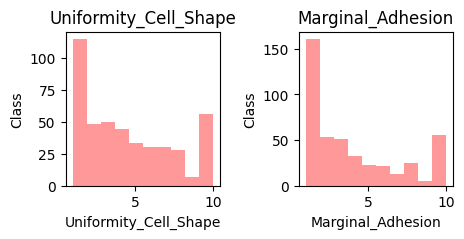

In [94]:
Numeric_features = [2, 3]

plt.figure(figsize = (5, 2))
plt.subplots_adjust(hspace = 0.5, wspace = 0.51)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(1, 2, i)
    plt.hist(x = df.iloc[: , Numeric_features[i - 1]], alpha = 0.4, color = 'red')
    plt.title(df.columns[Numeric_features[i - 1]])
    plt.xlabel(df.columns[Numeric_features[i - 1]])
    plt.ylabel("Class")
plt.show()

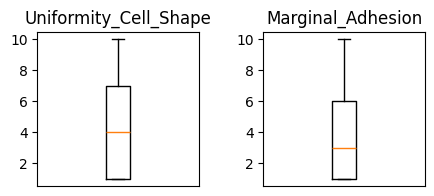

In [95]:
#Boxplot of numeric variables
plt.figure(figsize = (5, 2))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(1, 2, i)
    plt.boxplot(df.iloc[: , Numeric_features[i - 1]])
    plt.xticks([]) #remove the xticks
    plt.title(df.columns[Numeric_features[i - 1]])

plt.show()

In [96]:
df['Class'].value_counts()

,count
Class,
1,238
0,203


### Bivariate Analysis

In [97]:
#Correlation analysis
round(df.iloc[:, Numeric_features].corr(method = 'pearson'), 2)

,Uniformity_Cell_Shape,Marginal_Adhesion
Uniformity_Cell_Shape,1.0,0.6
Marginal_Adhesion,0.6,1.0


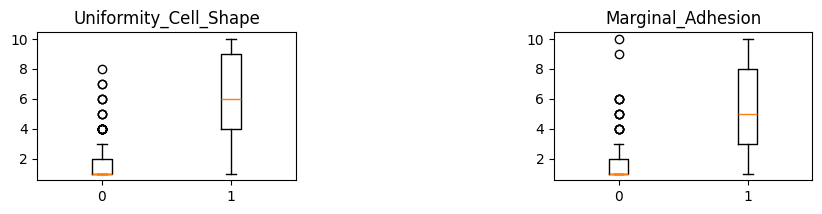

In [98]:
plt.figure(figsize = (10, 10))
plt.subplots_adjust(hspace = 0.4, wspace = 1)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(4, 2, i)
    plt.boxplot([df.loc[df['Class'] == 0, df.columns[Numeric_features[i - 1]]],
                 df.loc[df['Class'] == 1, df.columns[Numeric_features[i - 1]]]])
    plt.title(df.columns[Numeric_features[i - 1]])
    plt.xticks(ticks = [1, 2], labels = ['0', '1'])

plt.show()

## Data preparation

In [99]:
#Split data into test and train

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 1234)
print(f"Train shape: {train.shape}")
print(f"Test  shape: {test.shape}")

Train shape: (308, 9)
Test  shape: (133, 9)


In [100]:
df.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [46]:
# Define dummy variables for catogirical features in train set
# This code block was problematic as 'Bland_Chromatin' is treated as numerical, not categorical
# dummy_ = pd.get_dummies(train[['Bland_Chromatin']],
#                         drop_first=True
# )

# dummy_.info()


In [47]:
# Define X train - selecting all features except 'Class'
X_train = train.drop('Class', axis = 1)

X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
37,6,2,1,1,1,7,1,1
378,3,1,1,4,3,2,2,1
59,9,5,5,2,2,5,1,1
302,10,10,10,7,9,7,10,10
582,6,10,5,5,4,6,10,1


In [48]:
#Define y train (response)

y_train = train['Class']
y_train

,Class
37,0
378,0
59,1
302,1
582,1
...,...
267,1
58,1
413,0
282,1


In [49]:
# Define dummy variables for catogirical features in test set
# This code block was problematic and unnecessary
# dummy_2 = pd.get_dummies(test[['Class']],
#                          drop_first=True
# )

# dummy_2.info()

In [50]:
# Define X test - selecting all features except 'Class'
X_test = test.drop('Class', axis = 1)

X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
505,3,3,1,1,2,1,1,1
32,10,7,7,3,8,7,4,3
227,8,9,9,5,3,7,7,1
158,1,1,2,1,3,1,1,1
584,5,1,1,6,3,1,1,1


In [51]:
#Define y test (response)

y_test = test['Class']
y_test

,Class
505,0
32,1
227,1
158,0
584,0
...,...
288,1
362,0
675,0
117,1


## SVM for classification

In [52]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.svm import SVC

Model_1 = SVC(kernel="linear", random_state=0)
Model_1.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [54]:
# Predict train set
y_train_prediction_1 = Model_1.predict(X_train)
y_train_prediction_1

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [55]:
# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix

print("\nClassification Report:")
print('Accuracy: {r: 0.2f}'.format(r = accuracy_score(y_train, y_train_prediction_1)))
print('Precision: {r: 0.2f}'.format(r = precision_score(y_train, y_train_prediction_1)))
print('Recall: {r: 0.2f}'.format(r = recall_score(y_train, y_train_prediction_1)))

#If both false positive and false negatives are equally important,
# use F1 score
print('F1 score: {r: 0.2f}'.format(r = f1_score(y_train, y_train_prediction_1)))

#If false negatives are more costly, use F2 score,
# otherwise, if false positives are more costly, then use F0.5 score.
print('F2 score: {r: 0.2f}'.format(r = fbeta_score(y_train, y_train_prediction_1, beta = 2)))
print('\nConfusion Matrix:')
print(confusion_matrix(y_train, y_train_prediction_1))


Classification Report:
Accuracy:  0.93
Precision:  0.94
Recall:  0.94
F1 score:  0.94
F2 score:  0.94

Confusion Matrix:
[[124  11]
 [ 11 162]]


In [56]:
# Predicting test set
y_test_prediction_1 = Model_1.predict(X_test)
y_test_prediction_1

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0])

In [57]:
# Model evaluation on test - model 1

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix


Results = pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_1),
                        'Precision': precision_score(y_test, y_test_prediction_1),
                        'Recall': recall_score(y_test, y_test_prediction_1),
                        'F1 Score': f1_score(y_test, y_test_prediction_1),
                        'F2 Score': fbeta_score(y_test, y_test_prediction_1, beta = 2)
                       },
                       index = ['SVM - Not Tuned'])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
SVM - Not Tuned,0.93985,0.952381,0.923077,0.9375,0.928793


### Grid search for parameter tuning

In [58]:
10 ** np.linspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [59]:
from sklearn.model_selection import GridSearchCV

params = {'kernel':['linear','poly'],
          'degree': [2,3,4],
          'C': 10 ** np.linspace(-3, 3, 7)}

svc = SVC()

model_search = GridSearchCV(svc, params, cv=5)
model_search.fit(X_train, y_train)
model_search.best_params_

{'C': np.float64(10.0), 'degree': 3, 'kernel': 'poly'}

In [60]:
# Build the best SVC model

Model_2 = SVC(kernel=model_search.best_params_['kernel'],
              degree=model_search.best_params_['degree'],
              C=model_search.best_params_['C'],
              random_state=0)

Model_2.fit(X_train, y_train)

SVC(C=np.float64(10.0), kernel='poly', random_state=0)

In [61]:
# Predicting test set
y_test_prediction_2 = Model_2.predict(X_test)
y_test_prediction_2

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0])

In [62]:
#Model evaluation on test - model 2

Results = pd.concat([Results,
                     pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_2),
                                   'Precision': precision_score(y_test, y_test_prediction_2),
                                   'Recall': recall_score(y_test, y_test_prediction_2),
                                   'F1 Score': f1_score(y_test, y_test_prediction_2),
                                   'F2 Score': fbeta_score(y_test, y_test_prediction_2, beta = 2)
                                  },
                                  index = ['SVC - Tuned'])])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
SVM - Not Tuned,0.939850,0.952381,0.923077,0.937500,0.928793
SVC - Tuned,0.947368,0.953125,0.938462,0.945736,0.941358


In [63]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_prediction_2))


Confusion Matrix:
[[65  3]
 [ 4 61]]


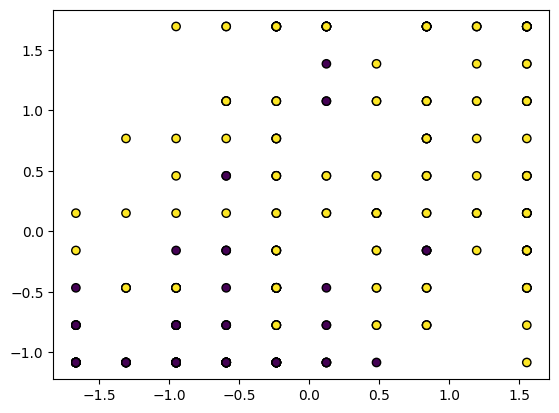

In [64]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
plt.show()

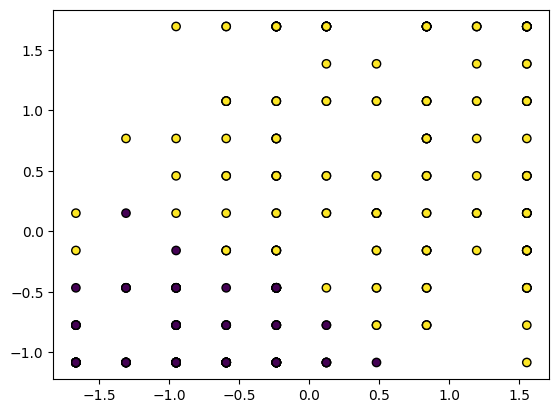

In [65]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_prediction_1, edgecolors="k")
plt.show()

In [66]:
Model_2.intercept_

array([0.92404847])

In [67]:
Model_2.support_

array([  0,   5,  13,  18,  21,  30,  35,  38,  50,  54,  58,  71,  89,
       114, 129, 154, 155, 161, 174, 184, 203, 207, 208, 269, 289, 292,
       298, 299,   7,   9,  12,  17,  29,  31,  37,  48,  49,  56,  59,
        70,  72,  73, 107, 121, 128, 130, 132, 133, 138, 142, 147, 149,
       153, 164, 172, 183, 191, 238, 249, 264, 276, 283, 288, 297, 300,
       303, 304, 306], dtype=int32)

In [68]:
Model_2.dual_coef_

array([[ -4.2592958 , -10.        , -10.        ,  -1.8416567 ,
        -10.        , -10.        , -10.        , -10.        ,
         -0.15413753,  -0.33035602,  -6.7710178 , -10.        ,
         -6.19479529, -10.        , -10.        , -10.        ,
        -10.        , -10.        , -10.        , -10.        ,
        -10.        , -10.        ,  -7.6870461 , -10.        ,
         -4.42824328, -10.        , -10.        , -10.        ,
          2.775184  ,  10.        ,   6.37023759,   4.89881589,
          4.33678868,   1.3654804 ,   1.65600575,  10.        ,
         10.        ,  10.        ,   4.13185231,  10.        ,
          2.75963333,  10.        ,   1.85180093,   2.4242962 ,
          0.70219001,  10.        ,  10.        ,   2.37958028,
          2.30402095,   0.66502961,   0.48876641,  10.        ,
          6.89667808,   0.12345747,   3.9158485 ,  10.        ,
          0.43896517,  10.        ,   0.05106159,   6.65634408,
         10.        ,  10.        ,  10.

# Your Excersice: DT & Random Forest

## Decision Tree for classification


In [69]:
from sklearn.tree import DecisionTreeClassifier

Model_1 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=20, random_state=40)

# fit the model on train set
Model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=40)

In [70]:
# Predict train set

y_train_prediction_1 = Model_1.predict(X_train)
y_train_prediction_1

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [71]:
#Predict test set

y_test_prediction_1 = Model_1.predict(X_test)

In [72]:
# print the scores on training and test set

from sklearn.metrics import accuracy_score

print('Training accuracy: {:.2f}'.format(accuracy_score(y_train, y_train_prediction_1)))

print('Test accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_prediction_1)))

Training accuracy: 0.91
Test accuracy: 0.90


In [73]:
# Model Evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix

Results = pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_1),
                        'Precision': precision_score(y_test, y_test_prediction_1),
                        'Recall': recall_score(y_test, y_test_prediction_1),
                        'F1 Score': f1_score(y_test, y_test_prediction_1),
                        'F2 Score': fbeta_score(y_test, y_test_prediction_1, beta = 2)
                       },
                       index = ['Decsion Tree Normal'])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decsion Tree Normal,0.902256,0.981481,0.815385,0.890756,0.843949


In [74]:
# Model Evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix

Results = pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_1),
                        'Precision': precision_score(y_test, y_test_prediction_1, average='weighted'),  # Added average parameter
                        'Recall': recall_score(y_test, y_test_prediction_1, average='weighted'),  # Added average parameter
                        'F1 Score': f1_score(y_test, y_test_prediction_1, average='weighted'),  # Added average parameter
                        'F2 Score': fbeta_score(y_test, y_test_prediction_1, beta=2, average='weighted')  # Added average parameter
                       },
                       index=['Decision Tree - Normal'])  # Fixed typo in 'Decision Tree'

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision Tree - Normal,0.902256,0.913287,0.902256,0.901395,0.900428


In [75]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_prediction_1)

print('Confusion matrix: \n\n', conf_mat)

Confusion matrix: 

 [[67  1]
 [12 53]]


### Grid Search for parameter turning for Decsion Tree

In [76]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(3,15),
          'max_features':['sqrt', 'log2']}

DT_search = GridSearchCV(DecisionTreeClassifier(),params,cv=10)

DT_search.fit(X_train, y_train)
DT_search.best_params_

{'max_depth': 5, 'max_features': 'log2'}

In [77]:
Model_2 = DecisionTreeClassifier(criterion='gini',
                                 max_depth=DT_search.best_params_['max_depth'],
                                 max_features=DT_search.best_params_['max_features'],
                                 random_state=40)

# fit the model on train set
Model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2', random_state=40)

In [78]:
#Predict test set
y_test_prediction_2 = Model_2.predict(X_test)

Results = pd.concat([Results,
                     pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_2),
                                   'Precision': precision_score(y_test, y_test_prediction_2, average='weighted'),
                                   'Recall': recall_score(y_test, y_test_prediction_2, average='weighted'),
                                   'F1 Score': f1_score(y_test, y_test_prediction_2, average='weighted'),
                                   'F2 Score': fbeta_score(y_test, y_test_prediction_2, average='weighted',
                                beta = 2)
                                  },
                                  index = ['Decision Tree - Tuned'])])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision Tree - Normal,0.902256,0.913287,0.902256,0.901395,0.900428
Decision Tree - Tuned,0.939850,0.940288,0.939850,0.939856,0.939801


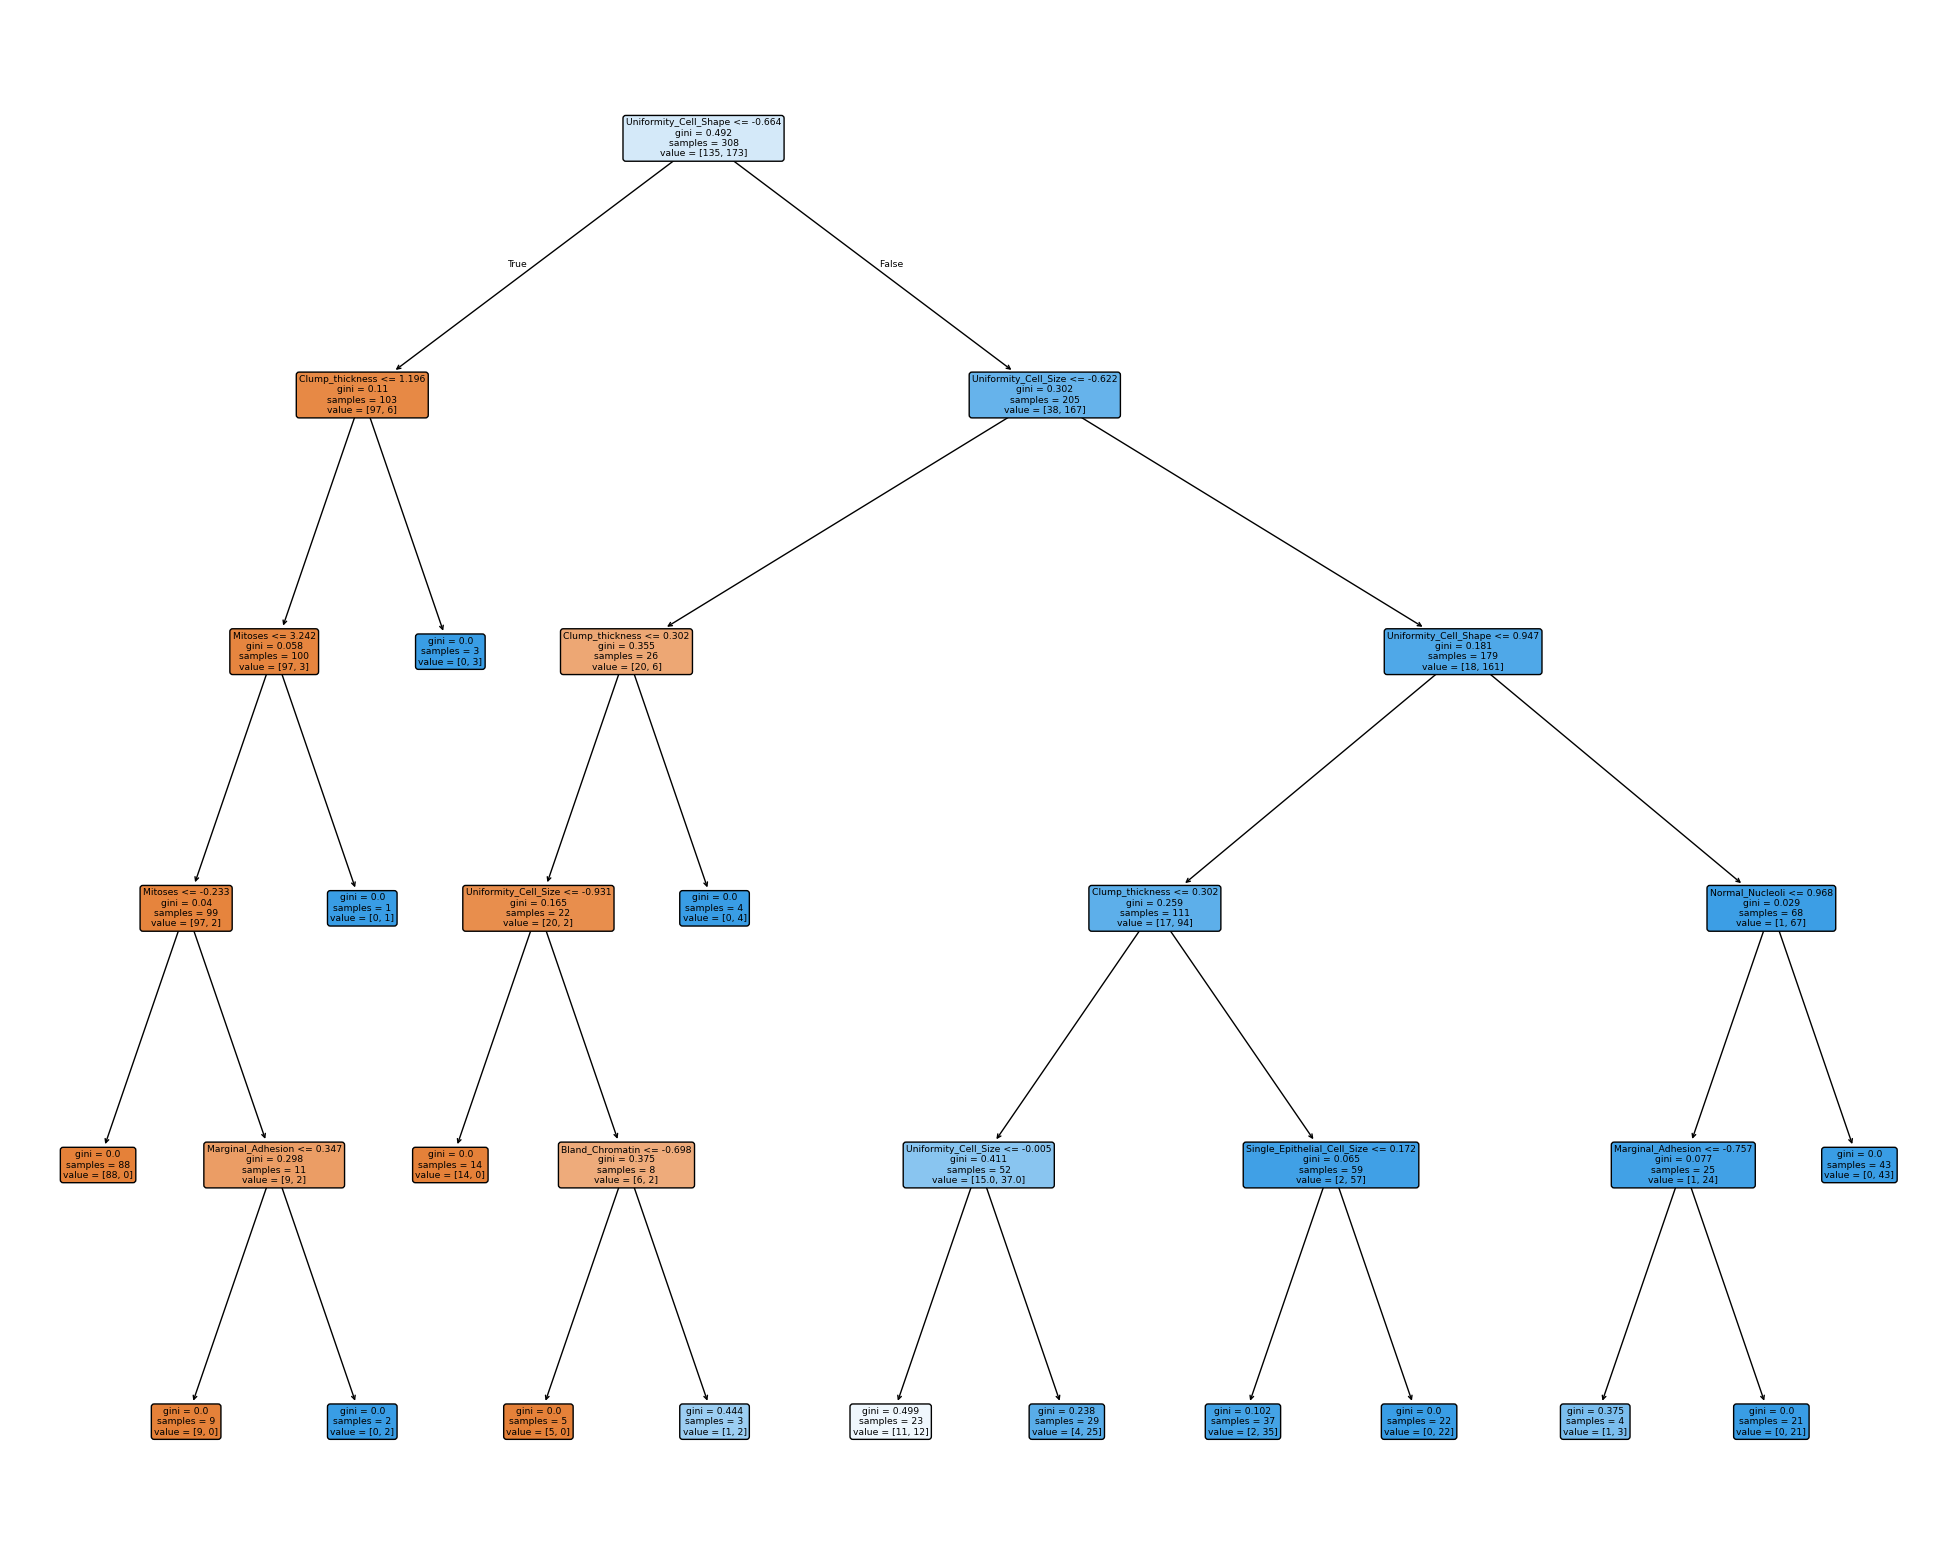

In [103]:
from sklearn.tree import plot_tree

# X_train was converted to a numpy array after scaling, so use the original dataframe columns
feature_names = df.drop('Class', axis=1).columns.tolist()

plt.figure(figsize = (25, 20))
plot_tree(Model_2, feature_names = feature_names, filled=True, rounded=True)
plt.show()

In [104]:
path=Model_2.cost_complexity_pruning_path(X_train,y_train)
alpha_grid=path['ccp_alphas']
alpha_grid

array([0.        , 0.00026176, 0.00076394, 0.00373869, 0.0062987 ,
       0.00884208, 0.01779536, 0.01816365, 0.06591408, 0.25468402])

In [105]:
DT_search.best_params_

{'max_depth': 5, 'max_features': 'log2'}

In [107]:
#K-fold cross validation to choose the best model

from sklearn.model_selection import cross_val_score

CV = np.zeros(shape = len(alpha_grid)) #to save cv results

for i in range(len(alpha_grid)):
    DT = DecisionTreeClassifier(max_depth=DT_search.best_params_['max_depth'],
                                max_features=DT_search.best_params_['max_features'],
                                random_state=40,
                                ccp_alpha = alpha_grid[i])

    scores = cross_val_score(estimator = DT,
                             X = X_train,
                             y = y_train,
                             scoring = 'accuracy',
                             cv = 5, n_jobs = -1)
    CV[i] = scores.mean()

In [108]:
#Best alpha
best_alpha = alpha_grid[np.argmax(CV)]
best_alpha

np.float64(0.003738685556867376)

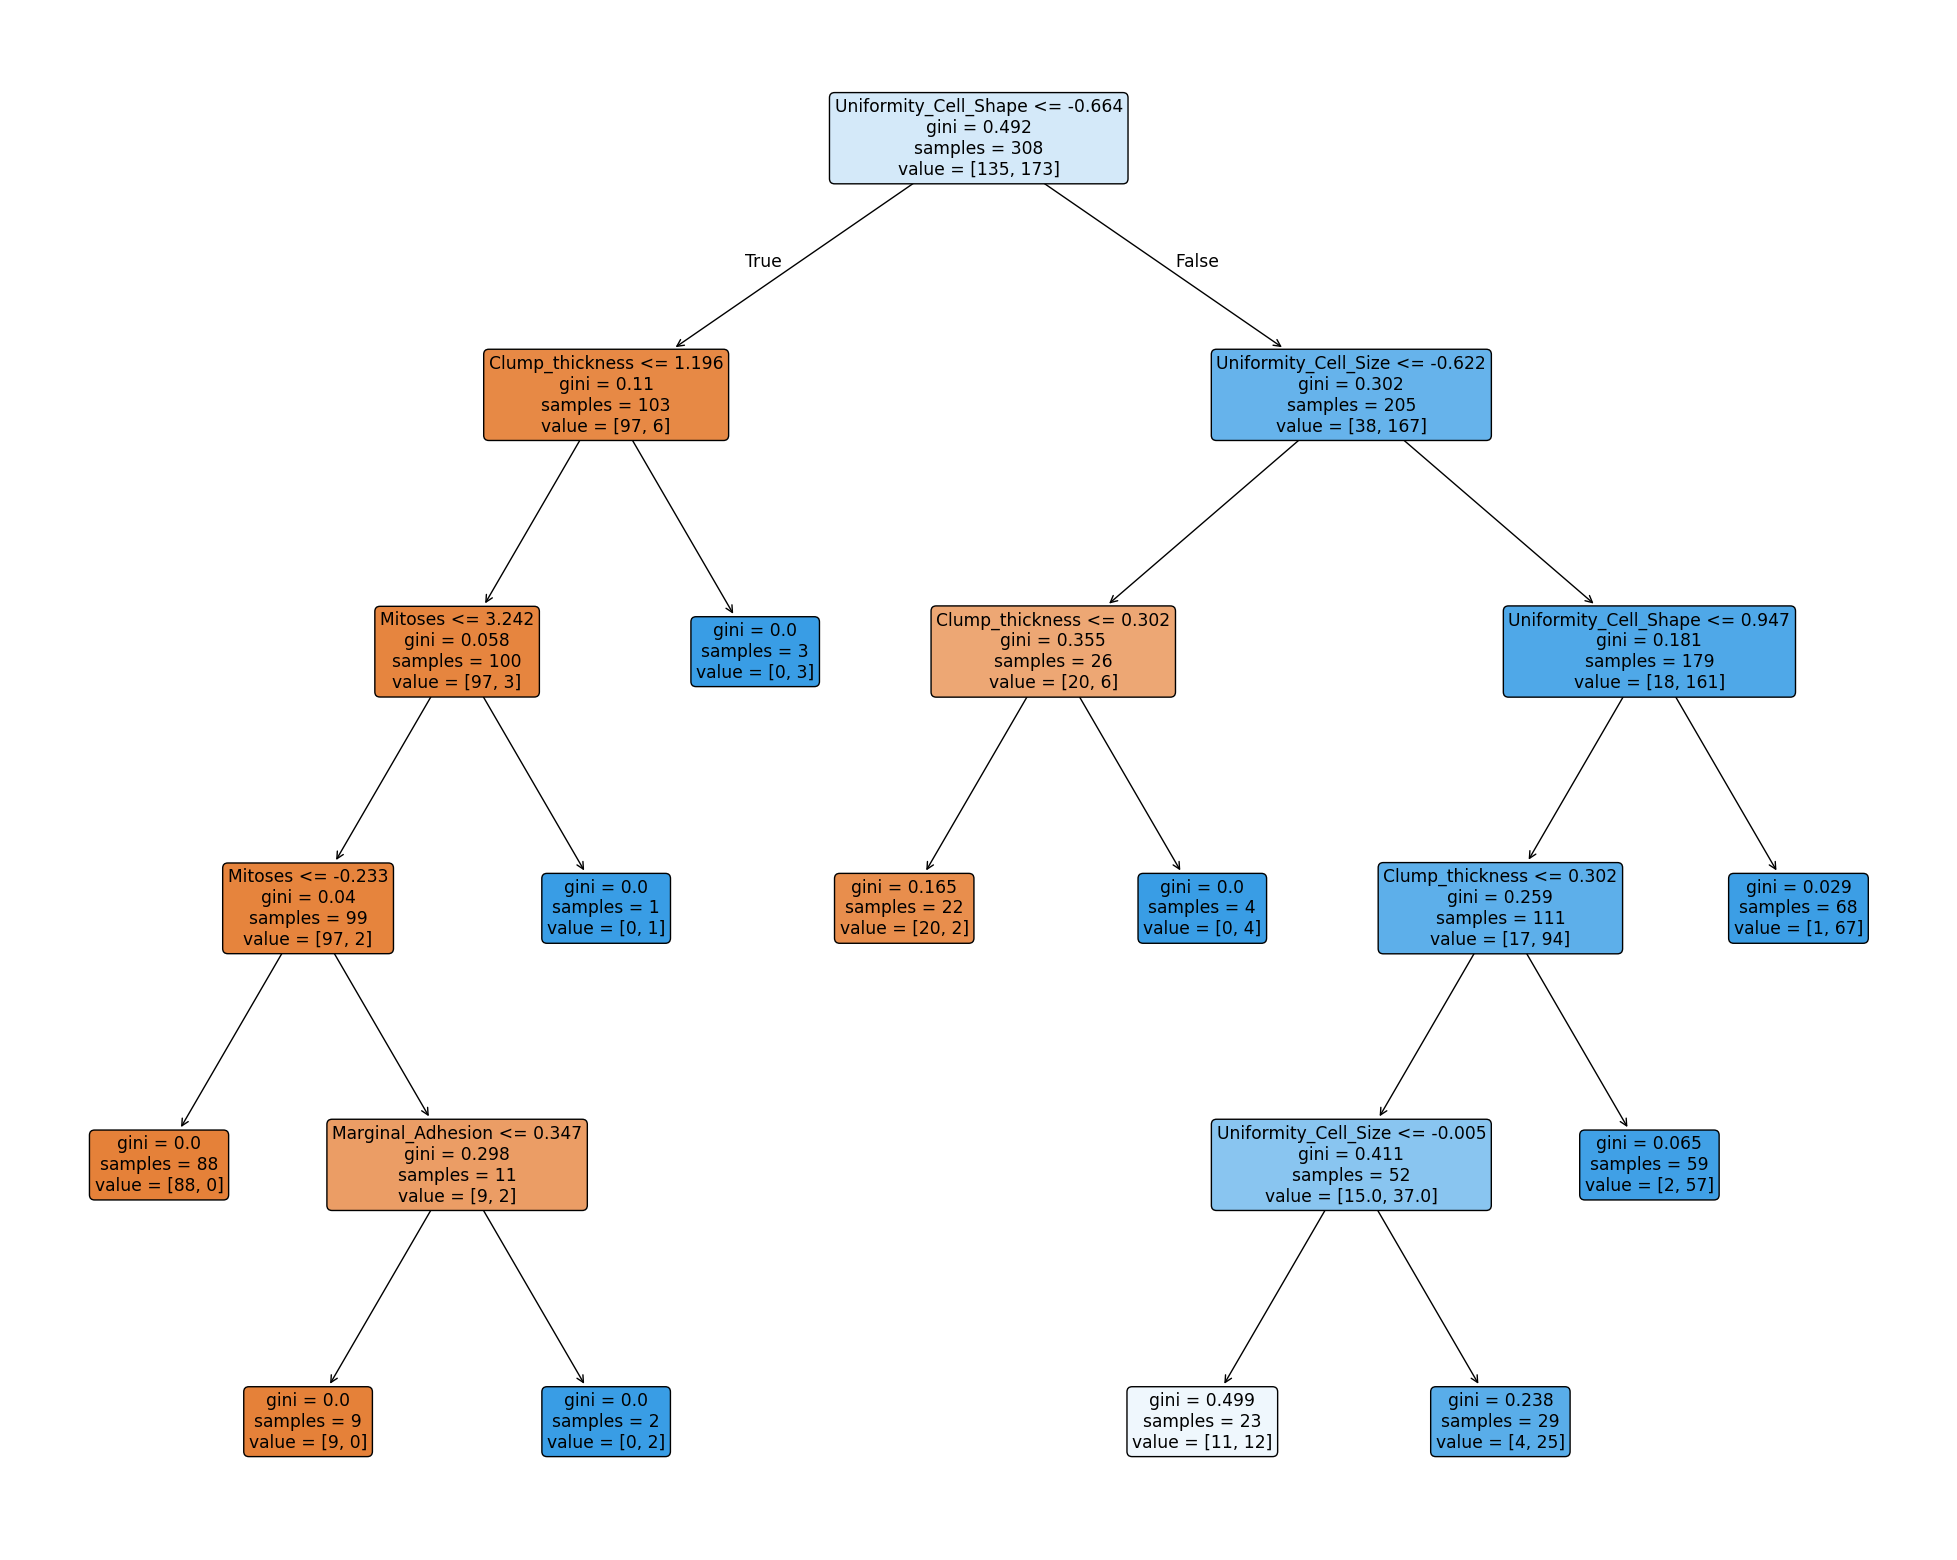

In [109]:
Model_3 = DecisionTreeClassifier(max_depth=DT_search.best_params_['max_depth'],
                                 max_features=DT_search.best_params_['max_features'],
                                 random_state=40,
                                 ccp_alpha = best_alpha)
Model_3.fit(X_train,y_train)

plt.figure(figsize = (25, 20))
# X_train is a numpy array after scaling, use the precomputed feature_names list
plot_tree(Model_3, feature_names = feature_names, filled=True, rounded=True)
plt.show()


In [110]:
y_test_prediction_3 = Model_3.predict(X_test)

Results = pd.concat([Results,
                     pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_3),
                                   'Precision': precision_score(y_test, y_test_prediction_3, average='weighted'),
                                   'Recall': recall_score(y_test, y_test_prediction_3, average='weighted'),
                                   'F1 Score': f1_score(y_test, y_test_prediction_3, average='weighted'),
                                   'F2 Score': fbeta_score(y_test, y_test_prediction_3, average='weighted',
                                beta = 2)
                                  },
                                  index = ['Decision Tree - Tuned & Pruned'])])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision Tree - Normal,0.902256,0.913287,0.902256,0.901395,0.900428
Decision Tree - Tuned,0.939850,0.940288,0.939850,0.939856,0.939801
Decision Tree - Tuned & Pruned,0.932331,0.932452,0.932331,0.932338,0.932321


## Random Forest for classification

In [111]:
from sklearn.ensemble import RandomForestClassifier

Model_4 = RandomForestClassifier(n_estimators = 200,
                                 max_features = 4,
                                 criterion = 'gini',
                                 max_depth = 10,
                                 min_samples_leaf = 15,
                                 random_state = 1)

#Fit the mode on the train set
Model_4.fit(X_train, y_train)

#Predict class for test set
y_train_prediction_4 = pd.Series(Model_4.predict(X_train))
y_train_prediction_4

,0
0,0
1,0
2,1
3,1
4,1
...,...
303,1
304,0
305,0
306,1


In [112]:
#Predict test set
y_test_prediction_4 = Model_4.predict(X_test)

Results = pd.concat([Results,
                     pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_4),
                                   'Precision': precision_score(y_test, y_test_prediction_4, average='weighted'),
                                   'Recall': recall_score(y_test, y_test_prediction_4, average='weighted'),
                                   'F1 Score': f1_score(y_test, y_test_prediction_4, average='weighted'),
                                   'F2 Score': fbeta_score(y_test, y_test_prediction_4, average='weighted',
                                beta = 2)
                                  },
                                  index = ['Random Forest - Not Tuned'])])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision Tree - Normal,0.902256,0.913287,0.902256,0.901395,0.900428
Decision Tree - Tuned,0.939850,0.940288,0.939850,0.939856,0.939801
Decision Tree - Tuned & Pruned,0.932331,0.932452,0.932331,0.932338,0.932321
Random Forest - Not Tuned,0.939850,0.940208,0.939850,0.939816,0.939785


### Grid Search for Random Forest Classifier

In [113]:
tuned_para={
    'n_estimators': range(50,200,25),
    'max_depth':range(3,7),
    'max_features':['auto', 'sqrt', 'log2']
}

Forest_search = GridSearchCV(RandomForestClassifier(random_state = 1),tuned_para,cv=10)

Forest_search.fit(X_train, y_train)
Forest_search.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 125}

In [114]:
Model_5 = RandomForestClassifier(n_estimators = Forest_search.best_params_['n_estimators'],
                                 max_features = Forest_search.best_params_['max_features'],
                                 criterion = 'gini',
                                 max_depth = Forest_search.best_params_['max_depth'],
                                 min_samples_leaf = 15,
                                 random_state = 1)
# fit the model on train set
Model_5.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=15, n_estimators=125,
                       random_state=1)

In [115]:
#Predict test set
y_test_prediction_5 = Model_5.predict(X_test)

Results = pd.concat([Results,
                     pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_5),
                                   'Precision': precision_score(y_test, y_test_prediction_5, average='weighted'),
                                   'Recall': recall_score(y_test, y_test_prediction_5, average='weighted'),
                                   'F1 Score': f1_score(y_test, y_test_prediction_5, average='weighted'),
                                   'F2 Score': fbeta_score(y_test, y_test_prediction_5, average='weighted',
                                    beta = 2)
                                  },
                                  index = ['Random Forest - Tuned'])])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision Tree - Normal,0.902256,0.913287,0.902256,0.901395,0.900428
Decision Tree - Tuned,0.939850,0.940288,0.939850,0.939856,0.939801
Decision Tree - Tuned & Pruned,0.932331,0.932452,0.932331,0.932338,0.932321
Random Forest - Not Tuned,0.939850,0.940208,0.939850,0.939816,0.939785
Random Forest - Tuned,0.977444,0.977544,0.977444,0.977439,0.977428


In [116]:
Results = pd.concat([Results,
                     pd.DataFrame({'Accuracy': accuracy_score(y_test, y_test_prediction_2),
                                   'Precision': precision_score(y_test, y_test_prediction_2),
                                   'Recall': recall_score(y_test, y_test_prediction_2),
                                   'F1 Score': f1_score(y_test, y_test_prediction_2),
                                   'F2 Score': fbeta_score(y_test, y_test_prediction_2, beta = 2)
                                  },
                                  index = ['SVC - Tuned'])])

Results

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision Tree - Normal,0.902256,0.913287,0.902256,0.901395,0.900428
Decision Tree - Tuned,0.939850,0.940288,0.939850,0.939856,0.939801
Decision Tree - Tuned & Pruned,0.932331,0.932452,0.932331,0.932338,0.932321
Random Forest - Not Tuned,0.939850,0.940208,0.939850,0.939816,0.939785
Random Forest - Tuned,0.977444,0.977544,0.977444,0.977439,0.977428
SVC - Tuned,0.939850,0.925373,0.953846,0.939394,0.948012


In [117]:
# Creat Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_prediction_5)

print('Confusion matrix: \n\n', conf_mat)

Confusion matrix: 

 [[67  1]
 [ 2 63]]
